# Social Relationship Recommendation

## Importing Libraries and DataSet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

data_folder = Path("Desktop/256_Proj")
df = pd.read_csv(data_folder / "dating.csv",encoding='unicode_escape')


In [2]:
df = df.dropna(axis=0, subset = ['from','income','goal','attr_o','age','age_o','match'])

In [3]:
df['attr_o'].astype(int)
df['goal'].astype(int)
df['income'].astype(int)
df['age'].astype(int)
df['age_o'].astype(int).head()

0    27
1    22
2    22
3    23
4    24
Name: age_o, dtype: int64

In [4]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

## Exploring the DataSet

In [6]:
df.shape

(4137, 195)

In [7]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

### Number of unique Dates

In [9]:
print('Total number of people that participated : {}'.format(len(df['iid'].unique())))
print('Total number of dates occurred: {}'.format(len(df.index)))

Total number of people that participated : 281
Total number of dates occurred: 4137


### Importance of Race & Religion on a scale of (1-10)

[Text(0, 0.5, 'Total Number of People'),
 Text(0.5, 0, 'Importance of Race in Dating (1-10)')]

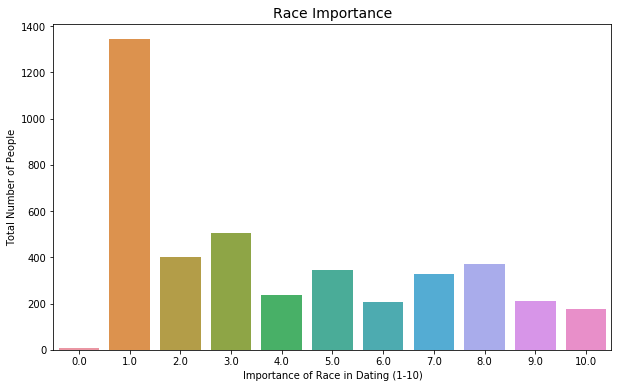

In [11]:
plt.figure(figsize=(10,6))
plt.title('Race Importance', fontsize=14)
axis_labels = sns.countplot(df['imprace'])
axis_labels.set(xlabel='Importance of Race in Dating (1-10)', ylabel='Total Number of People')

### Importance of Religion on a scale of (1-10)

[Text(0, 0.5, 'Total Number of People'),
 Text(0.5, 0, 'Importance of Religion in Dating (1-10)')]

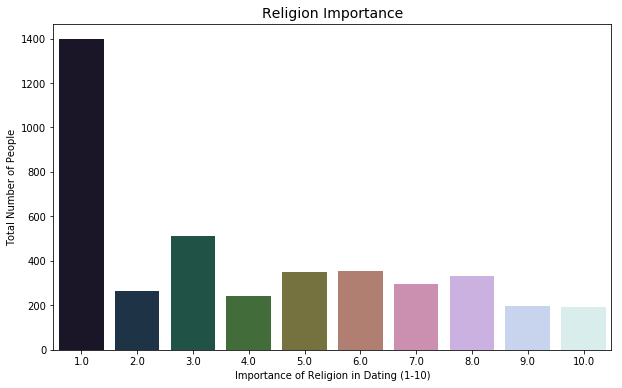

In [12]:
plt.figure(figsize=(10,6))
plt.title('Religion Importance', fontsize=14)
axis_labels = sns.countplot(df['imprelig'], palette = 'cubehelix')
axis_labels.set(xlabel='Importance of Religion in Dating (1-10)', ylabel='Total Number of People')


### Racial Distribution

2.0    2618
4.0     732
1.0     292
6.0     257
3.0     238
Name: race, dtype: int64


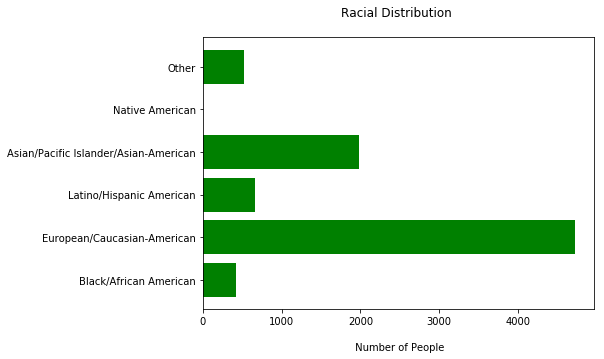

In [13]:
plt.figure(figsize=(7,5))
print(df['race'].value_counts())
plt.barh(np.arange(1,7), [420,4727,664,1982,0,522],color = 'green')
#.plot(kind='bar', color = 'pink')
plt.yticks(np.arange(1,7),('Black/African American','European/Caucasian-American',
                         'Latino/Hispanic American','Asian/Pacific Islander/Asian-American',
                         'Native American','Other')) 
plt.xlabel('\n Number of People')
plt.title('Racial Distribution \n')

plt.show()

### Gender Distribution

0    2428
1    1709
Name: gender, dtype: int64


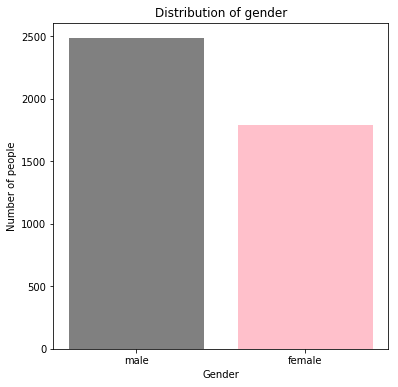

In [14]:
plt.figure(figsize=(6,6))
print(df['gender'].value_counts())
plt.bar(np.arange(1,3),[2486,1793],color=['gray','pink'])
plt.xticks(np.arange(1,3),['male','female'])
plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.show()

### Histogram of the age differences

Text(0, 0.5, 'Frequency')

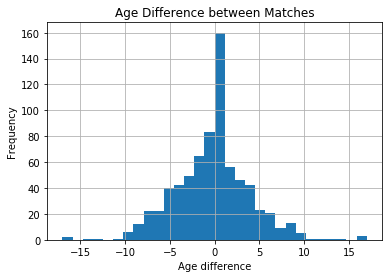

In [15]:
matches = df[df['match'] ==1]
age_diff = matches.age - matches.age_o
plt.figure()
age_diff.hist(bins=30)
plt.title('Age Difference between Matches')
plt.xlabel('Age difference')
plt.ylabel('Frequency')

## Preprocessing of data

### General count of the people with respect to location

In [16]:
df['from'].value_counts()

New York                     460
California                   236
Texas                        119
New York City                105
Maryland                     104
San Francisco                 81
NYC                           80
Philadelphia                  79
Washington, DC                73
Los Angeles                   69
Brooklyn, NY                  62
Long Island                   59
Minnesota                     58
Chicago                       57
Florida                       57
Pennsylvania                  55
Ohio                          46
Buffalo, NY                   44
Baltimore                     41
San Diego                     41
Los Angeles, CA               40
Houston                       39
Michigan                      37
new york                      37
PA                            35
Cincinnati, Ohio              34
New York, NY                  34
Northern California           34
Brooklyn                      34
Ann Arbor, MI                 33
          

### Cleaning the dataset for the right count

In [17]:
df.loc[df['from'].str.contains('NY', case=False, na= True), 'from'] = 'New York'

In [18]:
df.loc[df['from'].str.contains('india', case=False, na= True), 'from'] = 'India'
df.loc[df['from'].str.contains('california', case=False, na= True), 'from'] = 'California'
df.loc[df['from'].str.contains('lOS aNGELES', case=False, na= True), 'from'] = 'California'
df.loc[df['from'].str.contains('san diego', case=False, na= True), 'from'] = 'California'
df.loc[df['from'].str.contains('san francisco', case=False, na= True), 'from'] = 'California'
df.loc[df['from'].str.contains('UK', case=False, na= True), 'from'] = 'UK'
df.loc[df['from'].str.contains('New York', case=False, na= True), 'from'] = 'New York'
df.loc[df['from'].str.contains('china', case=False, na= True), 'from'] = 'China'
df.loc[df['from'].str.contains('tn', case=False, na= True), 'from'] = 'TN'
df.loc[df['from'].str.contains('South Jersey', case=False, na= True), 'from'] = 'South Jersey'
df.loc[df['from'].str.contains('texas', case=False, na= True), 'from'] = 'Texas'
df.loc[df['from'].str.contains('singapore', case=False, na= True), 'from'] = 'Singapore'
df.loc[df['from'].str.contains('ma', case=False, na= True), 'from'] = 'MA'
df.loc[df['from'].str.contains('pa', case=False, na= True), 'from'] = 'PA'
df.loc[df['from'].str.contains('bg', case=False, na= True), 'from'] = 'BG'
df.loc[df['from'].str.contains('New Jersey', case=False, na= True), 'from'] = 'NJ'
df.loc[df['from'].str.contains('NJ', case=False, na= True), 'from'] = 'NJ'
df.loc[df['from'].str.contains('ca', case=False, na= True), 'from'] = 'California'
df.loc[df['from'].str.contains('italy', case=False, na= True), 'from'] = 'Europe'
df.loc[df['from'].str.contains('Germany', case=False, na= True), 'from'] = 'Europe'
df.loc[df['from'].str.contains('New Jersey', case=False, na= True), 'from'] = 'NJ'
df.loc[df['from'].str.contains('Missouri', case=False, na= True), 'from'] = 'Missouri'
df.loc[df['from'].str.contains('Oregon', case=False, na= True), 'from'] = 'Oregon'
df.loc[df['from'].str.contains('MO', case=False, na= True), 'from'] = 'MO'
df.loc[df['from'].str.contains('OR', case=True, na= True), 'from'] = 'OR'
df.loc[df['from'].str.contains('NM', case=False, na= True), 'from'] = 'NM'
df.loc[df['from'].str.contains('France', case=False, na= True), 'from'] = 'Europe'
df.loc[df['from'].str.contains('Belgium', case=False, na= True), 'from'] = 'Europe'

df['from'].value_counts().head(20)

New York            1076
California           853
MA                   179
Texas                154
PA                    94
Philadelphia          79
MO                    78
Washington, DC        73
Long Island           59
Minnesota             58
Florida               57
Pennsylvania          55
Ohio                  46
TN                    42
Houston               39
Michigan              37
Brooklyn              34
Cincinnati, Ohio      34
Ann Arbor, MI         33
Miami                 33
Name: from, dtype: int64

### Datatype of 'from' before label encoding

In [19]:
df['from'].dtype

dtype('O')

### Coversion of string dtype to int dtype using a label encoder

In [20]:
le = preprocessing.LabelEncoder() 
le.fit(df['from'])
features = list(df['from'])
df['from'] = le.transform(df['from'])
df['from'].head(21)


0     14
1     14
2     14
3     14
4     14
5     14
6     14
7     14
8     14
9     14
10    35
11    35
12    35
13    35
14    35
15    35
16    35
17    35
18    35
19    35
30    62
Name: from, dtype: int64

### Datatype of 'from' after label encoding

In [21]:
df['from'].dtype

dtype('int64')

## Features and labels

In [22]:
X = df[['from','income','attr_o','age_o','goal']]
#X = df[['goal','from','attr_o','']]
y = np.array(df['match'])


In [23]:
X.shape

(4137, 5)

In [24]:
y.shape

(4137,)

## Test Train Split of the dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.35)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2689, 5)
(1448, 5)
(2689,)
(1448,)


## Models

### Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [60]:
print("Accuracy: {:.2f} ".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision: {:.2f} ".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.2f} ".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.80 
Precision: 0.39 
Recall: 0.17 


### Finding the importance of the features

In [29]:
rf =RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
#df.feature_names = ['goal','from','attr_o']
#df.feature_names = ['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order','partner', 'match', 'samerace', 'dec_o', 'dec']

In [31]:
df.feature_names = ['from','income','goal','attr_o','age_o']
feature_imp = pd.Series(rf.feature_importances_,index=df.feature_names).sort_values(ascending=False)
feature_imp

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


income    0.311935
attr_o    0.262473
from      0.188687
goal      0.160396
age_o     0.076509
dtype: float64

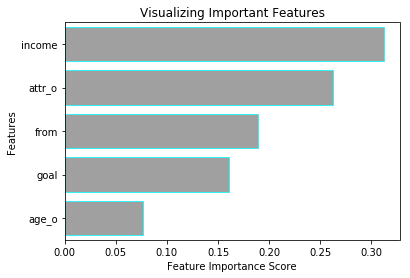

In [32]:
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index, color = 'gray', edgecolor = 'cyan', alpha = 0.75)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Support Vector Classifier

In [33]:
svc = SVC(class_weight='balanced')
svc.fit(X_train,y_train)
svc_predict = svc.predict(X_test)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,svc_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,svc_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,svc_predict)))

Accuracy Score: 0.73
Precision Score: 0.31
Recall Score: 0.36


In [35]:
confusion_matrix(y_test,svc_predict)

array([[965, 216],
       [172,  95]])

### Gradient Boosting

In [36]:
grad_boost = GradientBoostingClassifier(n_estimators=300,max_depth=8,verbose=1)
gb_fit = grad_boost.fit(X_train,y_train)
gb_predict = gb_fit.predict(X_test)

      Iter       Train Loss   Remaining Time 
         1           0.8707            2.38s
         2           0.8331            2.43s
         3           0.7992            2.43s
         4           0.7730            2.47s
         5           0.7481            2.47s
         6           0.7261            2.48s
         7           0.7034            2.48s
         8           0.6885            2.46s
         9           0.6770            2.41s
        10           0.6660            2.39s
        20           0.5555            2.32s
        30           0.4758            2.25s
        40           0.4276            2.09s
        50           0.4020            1.91s
        60           0.3684            1.77s
        70           0.3341            1.70s
        80           0.3079            1.59s
        90           0.2817            1.55s
       100           0.2639            1.47s
       200           0.1129            0.75s
       300           0.0720            0.00s


In [37]:
print("Accuracy Score: {:.2f}".format(metrics.accuracy_score(y_test,gb_predict)))
print("Precision Score: {:.2f}".format(metrics.precision_score(y_test,gb_predict)))
print("Recall Score: {:.2f}".format(metrics.recall_score(y_test,gb_predict)))

Accuracy Score: 0.78
Precision Score: 0.35
Recall Score: 0.22
